# Problem 4
## 1.

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt

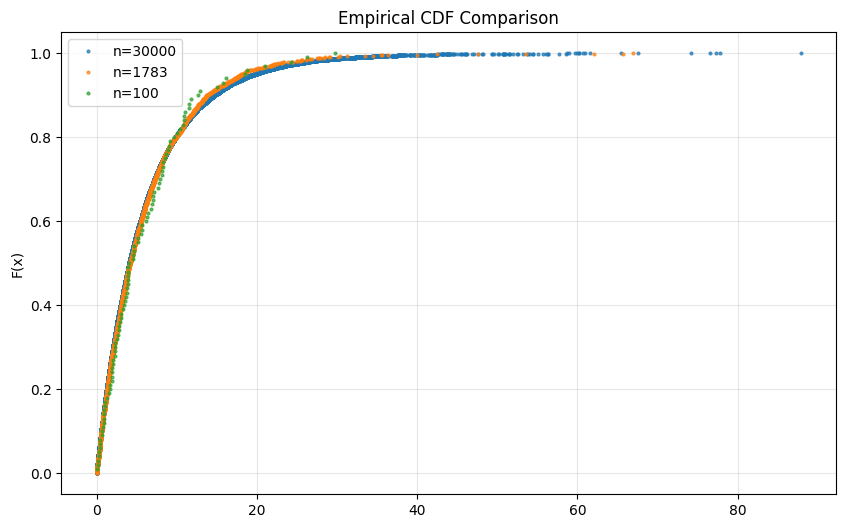

In [75]:
X = []
l0 = 5 # chose arbitrary rates, can be adjusted
l1 = 9 # these values are actually the mean (for exp sampling), actual values are 1/lambda to reflect l1 < l0 restriction

plt.figure(figsize=(10, 6))

for n in [30000, 1783, 100]:
    for _ in range(n):
        r1 = random.random()
        if r1 <= 0.3:      # P(C=1) = 0.3
            # C = 1
            X.append(np.random.exponential(scale=l1))
        else:
            # C = 0
            X.append(np.random.exponential(scale=l0))

    X_sorted = np.sort(X)
    Y = np.arange(1, len(X_sorted) + 1) / len(X_sorted)

    plt.plot(X_sorted, Y, marker='o', linestyle='none', markersize=2, label=f'n={n}', alpha=0.7)
    X.clear()

plt.title('Empirical CDF Comparison')
#plt.xscale('log')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2.

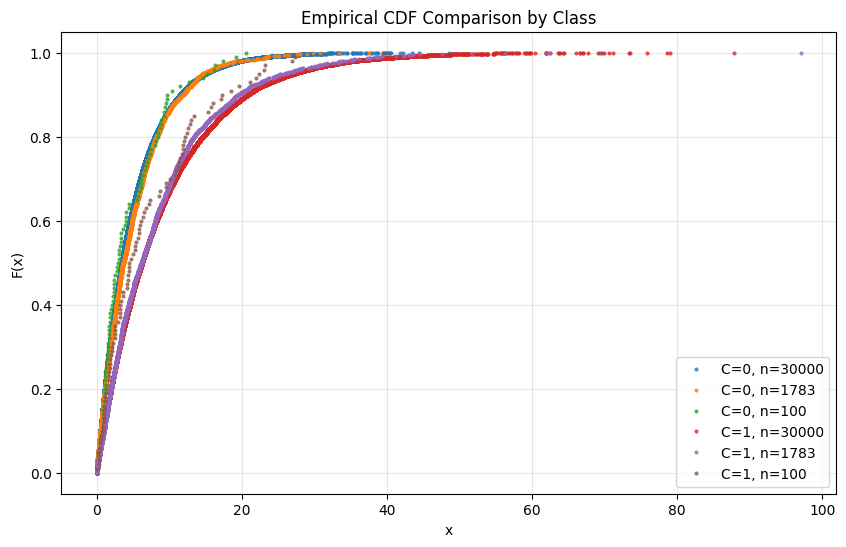

In [36]:
plt.figure(figsize=(10, 6))

for j in [0, 1]:
    for n in [30000, 1783, 100]:
        X1 = np.random.exponential(scale=(l1 if j == 1 else l0), size=n)

        X1_sorted = np.sort(X1)
        Y1 = np.arange(1, len(X1_sorted) + 1) / len(X1_sorted)
        plt.plot(X1_sorted, Y1, marker='o', linestyle='none', markersize=2, 
                 label=f'C={j}, n={n}', alpha=0.7)

plt.title('Empirical CDF Comparison by Class')
#plt.xlim(0, 6) # change scale?
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3.

In [94]:
runs = [i for i in range(100, 30001, 100)]

theoretical_mean_X = 0.7 * l0 + 0.3 * l1 # not 1/(lambda) because lambda is mean here
C = []
X2 = []
E_X = []
emp_means = []

sample_count = 0

for n in runs:
    while sample_count < n: # only generate new samples, not all over again.
        r2 = random.random()
        if r2 <= 0.3:      # P(C=1) = 0.3
            C.append(1)
            X2.append(np.random.exponential(scale=l1))
        else:
            C.append(0)
            X2.append(np.random.exponential(scale=l0))
        sample_count += 1
        
    E_X.append(np.mean(X2))

    C0_samples = [X2[i] for i in range(len(C)) if C[i] == 0]
    C1_samples = [X2[i] for i in range(len(C)) if C[i] == 1]

    p_c0 = len(C0_samples) / len(C)
    p_c1 = len(C1_samples) / len(C)

    c0_emp_mean = np.mean(C0_samples) if C0_samples else 0
    c1_emp_mean = np.mean(C1_samples) if C1_samples else 0

    emp_means.append(p_c0 * c0_emp_mean + p_c1 * c1_emp_mean)

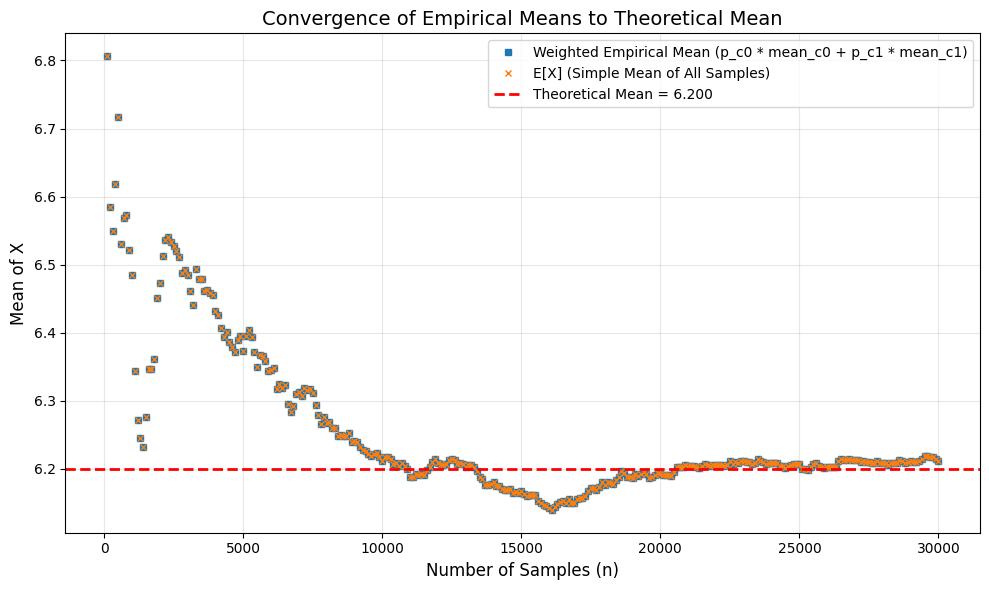

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(runs, emp_means, 's', label='Weighted Empirical Mean (p_c0 * mean_c0 + p_c1 * mean_c1)', markersize=5)
plt.plot(runs, E_X, 'x', label='E[X] (Simple Mean of All Samples)', markersize=5)
plt.axhline(y=theoretical_mean_X, color='r', linestyle='--', 
            label=f'Theoretical Mean = {theoretical_mean_X:.3f}', linewidth=2)

plt.xlabel('Number of Samples (n)', fontsize=12)
plt.ylabel('Mean of X', fontsize=12)
plt.title('Convergence of Empirical Means to Theoretical Mean', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4.
The plots of ecdf technically do not reveal anything about tail behavior.  We can plot the ccdf on a log-log scale to view the tail behavior.  The curve that is the most concave, condition $C = 1$ has the lightest tails.  Condition $C = 1$, has the smaller value of lambda which is associated with lighter tails.  The mixture distribution has a tail weight between that of the condition $C = 0$ and condition $C = 1$ which is expected due to how the mixture is formulated.

# Problem 5
## 1.

In [96]:
sims = [i for i in range(10, 10**6, 1000)]

mu = []
s_2 = []
C2 = []
X3 = []
sample_count2 = 0

alpha = 1  # Choose value > 0

for i in sims:
    while sample_count2 < i: # same logic as before, only generate new samples
        X3.append(random.lognormvariate(0, 1))
        sample_count2 += 1
    
    current_mu = np.mean(X3)
    current_s_2 = np.sum((np.array(X3) - current_mu)**2) / (len(X3) - 1)
    
    mu.append(current_mu)
    s_2.append(current_s_2)
    C2.append(current_mu + alpha * np.sqrt(current_s_2))  # formula for C


print(f"Average mu: {np.mean(mu)}, Average s_2: {np.mean(s_2)}, Average C2: {np.mean(C2)}")

Average mu: 1.6507834405758144, Average s_2: 4.740402815866363, Average C2: 3.8277187377141426


## 2.

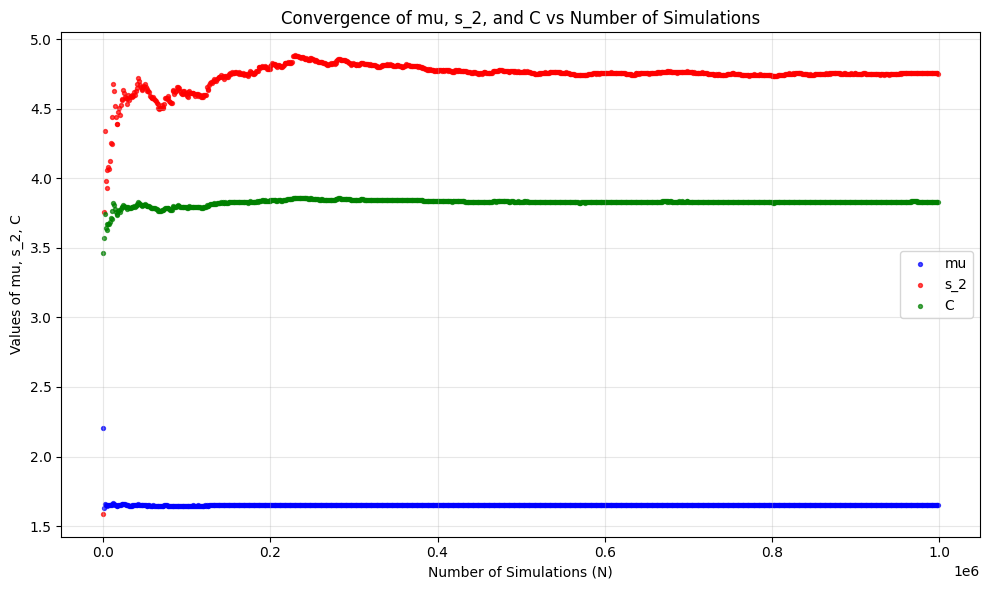

In [104]:
plt.figure(figsize=(10, 6))

plt.scatter(sims, mu, color='blue', label='mu', s=8, alpha=0.7)
plt.scatter(sims, s_2, color='red', label='s_2', s=8, alpha=0.7)
plt.scatter(sims, C2, color='green', label='C', s=8, alpha=0.7)

plt.xlabel('Number of Simulations (N)')
plt.ylabel('Values of mu, s_2, C')
#plt.xscale('log')
plt.title('Convergence of mu, s_2, and C vs Number of Simulations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3.
We choose evaluating the the coefficients of variation (standard deviation divided by mean). As the standard deviation is closer to the mean, the proportion goes to 0. For C, it is almost triple that of mu, confirming the stronger stability of mu. The stronger long-term convergence behavior can not really be seen from the graph, and the scale is definitely not interpretable from it.

In [ ]:
mu_cv = np.std(mu[len(mu) // 4:]) / np.mean(mu[len(mu) // 4:]) # eliminate outliers from beginning
C2_cv = np.std(C2[len(C2) // 4:]) / np.mean(C2[len(C2) // 4:])

print(f'Coefficient of Variation for mu: {mu_cv}')
print(f'Coefficient of Variation for C2: {C2_cv}')

Coefficient of Variation for mu: 0.0059570403305911
Coefficient of Variation for C2: 0.014811722453428818


## 4.
Nonlinear risk metrics can be harder to estimate than means because nonlinear functions can sometimes ignore information that linear ones do not. In the linear case, if the mean is updated by a value greater than the current mean and then the next value is lower, the mean will move up and down accordingly. But with squared terms, the difference is one-directional - it is always positive. So you lose an important part of the information. If two terms are greater than and less than the current mean by the same value, the result you will get is the same, even though the behavior is totally opposite.